Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。


79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。


House Prices: Advanced Regression Techniques


今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。


・線形回帰

・SVM

・決定木

・ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。

##練習のための準備

このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説GrLivAreaとYearBuiltの2つだけを利用することにします。

##【問題1】練習のために特徴量の選択

データセットを読み込んだ後、GrLivAreaとYearBuiltを抜き出してください。

In [472]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [473]:
df = pd.read_csv('C:/Users/iwaju/Desktop/Python/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [474]:
df_sel = df[['GrLivArea', 'YearBuilt', 'SalePrice']]
df_sel

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


##【問題2】線形回帰による推定と評価

データを簡単に分析、前処理し、 *線形回帰* による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation


評価のための指標値は回帰問題では *平均二乗誤差（Mean Squared Error, MSE）* を使うことが一般的です。


sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。

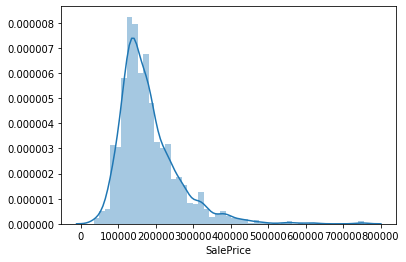

In [475]:
#分析
sns.distplot(df_sel["SalePrice"])

In [476]:
print("Kurtosis(尖度)  :", df_sel["SalePrice"].kurt())
print("Skewness(歪度)  :", df_sel["SalePrice"].skew())

Kurtosis(尖度)  : 6.536281860064529
Skewness(歪度)  : 1.8828757597682129


In [477]:
#対数変換
df_sel['SalePrice'] = df_sel['SalePrice'].apply(np.log)
df_sel['SalePrice']


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

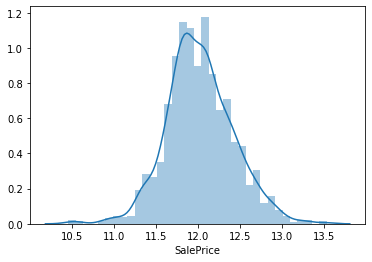

In [478]:
sns.distplot(df_sel["SalePrice"])

In [479]:
print("Kurtosis(尖度)  :", df_sel["SalePrice"].kurt())
print("Skewness(歪度)  :", df_sel["SalePrice"].skew())

Kurtosis(尖度)  : 0.8095319958036296
Skewness(歪度)  : 0.12133506220520406


In [480]:
#前処理
X = np.array(df[["GrLivArea","YearBuilt"]])
y = np.array(df['SalePrice'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1022, 2)
(438, 2)
(1022,)
(438,)


In [481]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

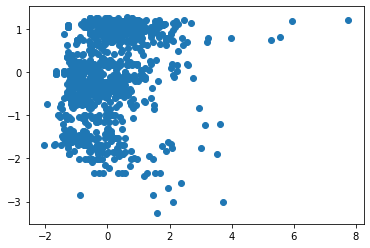

In [482]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])

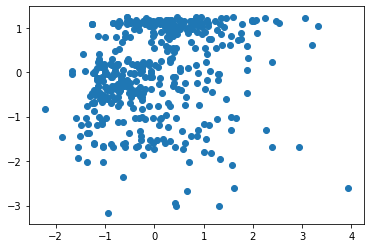

In [483]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1])

In [484]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train.ravel())
y_pred = reg.predict(X_test_scaled)
print(y_pred.shape)
print(y_test.shape)

(438,)
(438,)


In [485]:
mean_squared_error(y_test, y_pred)

2135362034.5408695

##【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。


・二乗平均平方根誤差とは実際の値と予測値の絶対値の 2 乗を平均したもの
値が小さいほど誤差の少ないモデル引用https://aiacademy.jp/media/?p=261

・線形回帰

・SVM

・決定木

・ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVR — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation

SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。

In [486]:
#テスト
reg = LinearRegression()
reg.fit(X_train_scaled, y_train.ravel())
y_pred = reg.predict(X_test_scaled)

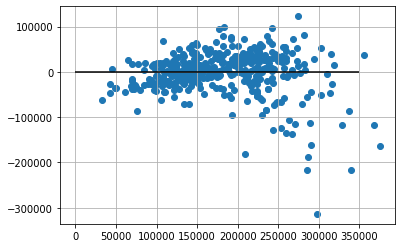

In [487]:
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0,xmin=0,xmax=350000, color='black')
plt.grid()
plt.show()

In [499]:
#関数定義
def test_train(X_train, X_test, y_train, y_test,model):
    #yを1次元に
    model.fit(X_train_scaled, y_train.ravel())
    y_pred = model.predict(X_test_scaled)
    print("mean_squared_error:{:.0f}".format(mean_squared_error(y_test, y_pred)))
    plt.scatter(y_pred, y_pred - y_test)
    #水平線
    plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), color='black')
    plt.grid()
    plt.show()

mean_squared_error:2135362035


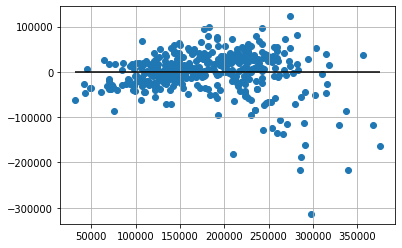

In [504]:
#線形回帰
reg = LinearRegression()

test_train(X_train, X_test, y_train, y_test, reg)

mean_squared_error:6867404458


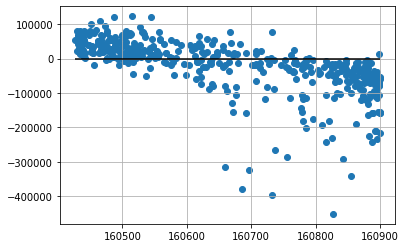

In [505]:
#SVM
svr = SVR()

test_train(X_train, X_test, y_train, y_test, svr)

mean_squared_error:2800899411


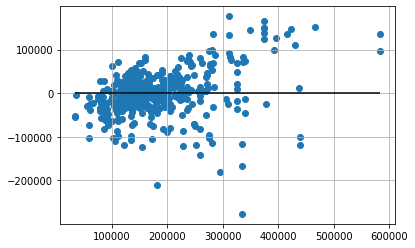

In [506]:
#決定木
regressor = DecisionTreeRegressor()

test_train(X_train, X_test, y_train, y_test, regressor)

mean_squared_error:1593060951


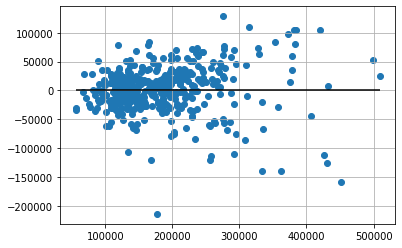

In [507]:
#ランダムフォレスト
rand = RandomForestRegressor()

test_train(X_train, X_test, y_train, y_test, rand)

In [508]:
#指標値を１つの表に

listA =["2135362035", "6867404458", "2800899411", "1593060951"]
ind = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
col=["res"]

con = pd.DataFrame(data=listA, index = ind, columns=col)
con

,res
Linear Regression,2135362035
SVM,6867404458
Decision Tree,2800899411
Random Forest,1593060951


考察

ランダムフォレストが最良のモデルとなっている

線形回帰と決定木の平均二乗誤差は多少近い数値である

決定木とランダムフォレストの図は類似している

##【問題4】（アドバンス課題）他の特徴量も使用しての学習

ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。


KaggleのNotebooksも参考にできます。


House Prices: Advanced Regression Techniques | Kaggle

Week3授業前課題2_住宅情報の分析よりOverallQuaとFullBathも目的変数との相関が高いため追加

In [509]:
#欠損値確認
df['OverallQual'].isnull().sum()
df['FullBath'].isnull().sum()


0

In [510]:
X_2 = ['GrLivArea', 'YearBuilt', 'OverallQual', 'FullBath']
y_2 = ['SalePrice']
x_con = pd.DataFrame(df, columns = X_2)
y_con = pd.DataFrame(df, columns = y_2)

xy_con = pd.concat([x_con, y_con], axis=1)

xy_con

,GrLivArea,YearBuilt,OverallQual,FullBath,SalePrice
0,1710,2003,7,2,208500
1,1262,1976,6,2,181500
2,1786,2001,7,2,223500
3,1717,1915,7,1,140000
4,2198,2000,8,2,250000
...,...,...,...,...,...
1455,1647,1999,6,2,175000
1456,2073,1978,6,2,210000
1457,2340,1941,7,2,266500
1458,1078,1950,5,1,142125


In [511]:
X1 = np.array(df[['GrLivArea', 'YearBuilt', 'OverallQual', 'FullBath']])
y1 = np.array(df['SalePrice'])

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.30, random_state=100)

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(1022, 4)
(438, 4)
(1022,)
(438,)


In [512]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train1)

X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

mean_squared_error:2135362035


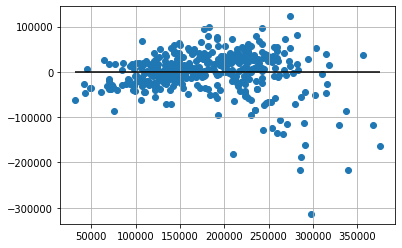

In [513]:
#線形回帰
reg1 = LinearRegression()

test_train(X_train1, X_test1, y_train1, y_test1, reg1)

mean_squared_error:6867404458


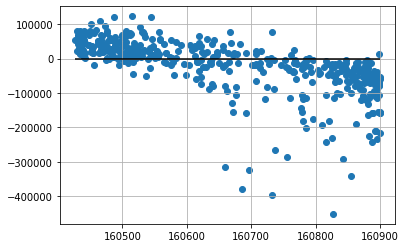

In [514]:
#SVM
svr1 = SVR()

test_train(X_train1, X_test1, y_train1, y_test1, svr2)

mean_squared_error:2839369166


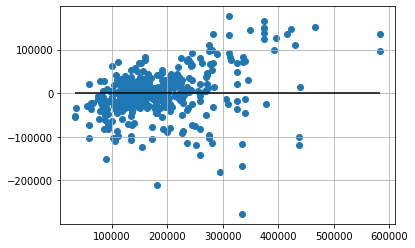

In [515]:
#決定木
regressor1 = DecisionTreeRegressor()

test_train(X_train1, X_test1, y_train1, y_test1, regressor1)

mean_squared_error:1609240527


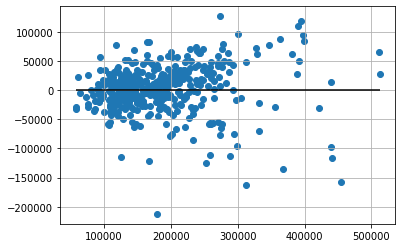

In [516]:
#ランダムフォレスト
rand1 = RandomForestRegressor()

test_train(X_train1, X_test1, y_train1, y_test1, rand1)

In [518]:
listB =["2135362035", "6867404458", "2839369166", "1609240527"]
ind1 = ['Linear Regression', 'SVM', 'Decision Tree', 'Random Forest']
col1 = ["res"]

con = pd.DataFrame(data=listB, index = ind1, columns = col1)
con

,res
Linear Regression,2135362035
SVM,6867404458
Decision Tree,2839369166
Random Forest,1609240527


考察

ランダムフォレストが最良のモデルになる

前回のとあまり変化がなかった。OverallQuaとFullBathのランクを数値に変換したほうがよかったのか？

平均二乗誤差 (MSE)以外にも平均絶対誤差 (MAE)、二乗平均平方根誤差 (RMSE)、決定係数 (R2)があるのでやってみよう

平均絶対誤差 (MAE):実際の値と予測値の絶対値を平均したもの、*値が小さければ小さいほど、誤差の小さいモデルである*

二乗平均平方根誤差 (RMSE):MSEで、二乗したことの影響を平方根で補正したもの、*値が小さければ小さいほど、誤差の小さいモデルである*

決定係数 (R2):推定された回帰式の当てはまりの良さ（度合い）を表す、*0に近ければあまり良くない性能*

In [528]:
df2 = df[['GrLivArea', 'YearBuilt', 'OverallQual', 'FullBath', 'SalePrice']]
X2 = np.array(df[['GrLivArea', 'YearBuilt', 'OverallQual', 'FullBath']])
y2 = np.array(df['SalePrice'])


X2 = np.array(X2)
y2 = np.array(y2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.30, random_state=100)

y_train_2 = y_train2.reshape(-1, 1)
y_test_2 = y_test2.reshape(-1, 1)

In [560]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


#関数定義
def test_train(X_train, X_test, y_train, y_test,model,columns):
    #yを1次元に
    model.fit(X_train_scaled, y_train.ravel())
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    print("MSE:{}".format(mse))
    print("MAE:{}".format(mean_absolute_error(y_test, y_pred)))
    print("RMSE:{}".format(np.sqrt(mse)))
    print("R2:{}".format(r2_score(y_test, y_pred)))
    plt.scatter(y_pred, y_pred - y_test)
    #水平線
    plt.hlines(y = 0, xmin = min(y_pred), xmax = max(y_pred), color='black')
    plt.grid()
    plt.show()
    return {"MSE":mse, "MAE":mean_absolute_error(y_test, y_pred), "RMSE":np.sqrt(mse), "R2":r2_score(y_test, y_pred)}

MSE:2135362034.5408695
MAE:31217.83204532382
RMSE:46209.97765137816
R2:0.66818589655446


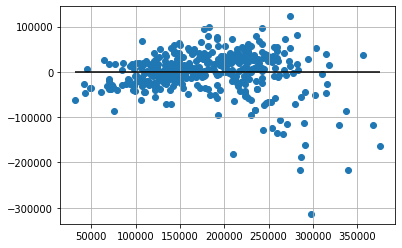

In [561]:
#一つの表で表示
one_table = {}

#線形回帰
reg1 = LinearRegression()

one_table["LR"] = test_train(X_train, X_test, y_train, y_test, reg1, df2.columns)

MSE:6867404457.51711
MAE:55474.38990772913
RMSE:82869.80425653912
R2:-0.06712661188569613


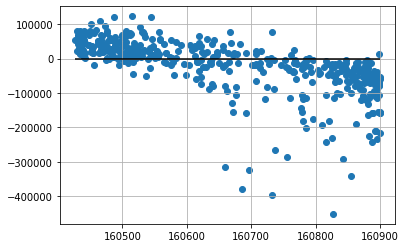

In [562]:
#SVM
svr = SVR()

one_table["SVM"] = test_train(X_train, X_test, y_train, y_test, svr, df2.columns)

MSE:2862735491.9699397
MAE:36609.85464231355
RMSE:53504.53711574318
R2:0.5551592679346422


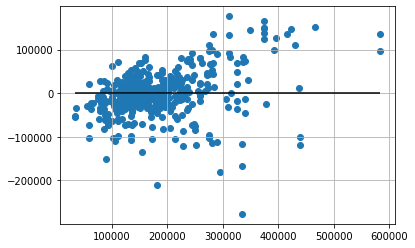

In [563]:
#決定木
regressor = DecisionTreeRegressor()

one_table["DTR"] = test_train(X_train, X_test, y_train, y_test, regressor, df2.columns)

MSE:1649707618.6862972
MAE:29131.69283928571
RMSE:40616.59289854698
R2:0.7436517810154999


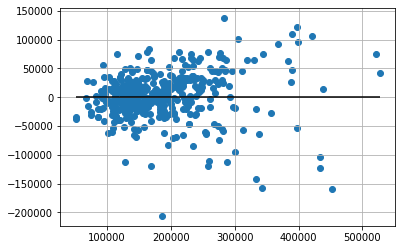

In [564]:
#ランダムフォレスト
rand = RandomForestRegressor()

one_table["RFR"] = test_train(X_train, X_test, y_train, y_test, rand, df2.columns)

In [565]:
print(one_table)

{'LR': {'MSE': 2135362034.5408695, 'MAE': 31217.83204532382, 'RMSE': 46209.97765137816, 'R2': 0.66818589655446}, 'SVM': {'MSE': 6867404457.51711, 'MAE': 55474.38990772913, 'RMSE': 82869.80425653912, 'R2': -0.06712661188569613}, 'DTR': {'MSE': 2862735491.9699397, 'MAE': 36609.85464231355, 'RMSE': 53504.53711574318, 'R2': 0.5551592679346422}, 'RFR': {'MSE': 1649707618.6862972, 'MAE': 29131.69283928571, 'RMSE': 40616.59289854698, 'R2': 0.7436517810154999}}


In [566]:
#１つの表にまとめる
pd.DataFrame(one_table)

,LR,SVM,DTR,RFR
MSE,2.135362e+09,6.867404e+09,2.862735e+09,1.649708e+09
MAE,3.121783e+04,5.547439e+04,3.660985e+04,2.913169e+04
RMSE,4.620998e+04,8.286980e+04,5.350454e+04,4.061659e+04
R2,6.681859e-01,-6.712661e-02,5.551593e-01,7.436518e-01


考察

ランダムフォレストが最良のモデル、続いて線形回帰、決定木、SVM

SVMのR2がマイナスなのが気になる、0から-6つまり6ということなのかな？

決定木、ランダムフォレストは図が類似している

2つの特徴量を追加したが、結果は前回とあまり変わらない
OverallQuaとFullBathのランクを数値に変換したほうがよいのか？